<h1>Parham Sazdar 810102166</h1>
<h2>Curve Fitting with Genetic Algorithm</h2>
<h3>Introduction</h3>
<p>This software employs a genetic algorithm to perform curve fitting via a polynomial expression. The objective is to identify the optimal coefficients for the polynomial equation, reducing the disparity between the curve and a provided dataset. The genetic algorithm is employed to explore and evolve a population of potential solutions, seeking the best-fit solution.</p>
<h3>Curve Fitting</h3>
<p>The problem of finding the curve that best fits a number of data points. The philosophical interest lies in justifying any particular trade-off of simplicity, accuracy, and boldness, that may commend itself. The problem of induction can be represented graphically as a curve-fitting problem.</p>
<h3>Genetic Algorithm</h3>
<p>The genetic algorithm is a method for solving both constrained and unconstrained optimization problems that is based on natural selection, the process that drives biological evolution. The genetic algorithm repeatedly modifies a population of individual solutions.</p>
<h3>How this program work ?</h3>
<h4>Input Data</h4>
<p>The input our program is just a .txt file that contains some information about our program and some configurable data that our program must work with it. So what is the contex of our input file ?</p>
<h4>The input file should have the following format:</h4>
<ul>
  <li>Number of datasets</li>
  <li>Number of data points and polynomial degree for each dataset</li>
  <li>x-coordinate and y-coordinate for each data point</li>
</ul>
<h4>For example:</h4>
1

4 2

1 5
2 8
3 13
4 20

<p>This example represents one dataset with 4 data points and a polynomial degree of 2. The data points are (1, 5), (2, 8), (3, 13), and (4, 20).</p>
<h4>Outcome Format</h4>
<p>Testcase <dataset index>:<br />
The Coefficients: [ <coefficient1> , <coefficient2> , ... ]<br />
Mean Square Error: <mean square error></p><br />
<h5>For example:</h5>
<p>Testcase 1:<br />
The Coefficients: [ 2.48 , 0.95 , 0.05 ]<br />
Mean Square Error: 0.32456789012345678900</p>



<h2>1.Step One</h2>
<h3>Gene and Chromosome</h3>
<p>The solution is encoded as a chromosome using a floating-point representation of the polynomial coefficients. The genes represent the coefficients of the polynomial equation.So if the degree of our equation is n it means that each chromosome is formed by n genes.</p>
<p>In first part of the program the gens in each chromosome initialize randomly.</p>
<p>So first of all we have to consider some problem paramet like  of populatuin List (it consist our chromosome tuple) , nmber of population (The count of chromosome in each generation) and the number of generation (It means how many iteration our genetic alogorithm is going to execute and generate new one) </p>

In [153]:
import random as rn
import matplotlib.pyplot as plt

input_file_path = "input.txt"  # the path for input file
population = []  # chromosomes are going to append in this array
number_of_population = 100  # number of chromosome in each iteration
number_of_generation = 10 # our genetic iteration count
all_input_file = []  # all the lines  of input locate in this array
fitness_array = []  # using for append each chromosome fitness value
roulette = []  # using for our selection algorithm

<h2>1.1</h2>
<h3>Load data From input file</h3>
<p>First of all we are going to load our data from file.</p>


In [154]:

def read_file():
    listFile = []
    file = open(input_file_path, "r")
    for row in file:
        line = row.strip("\n")
        listFile.append(line.split())
    file.close()
    return listFile


all_input_file = read_file()

<h2>2.Step Two</h2>
<h3>Generate primitive population</h3>
<p>We are going to define funcation to generate our primitive population and append them to population array</p>

<h5>The function below is generating our chromosome and the count of genes in each chromosome is generated based on degree of our problem and also these are random value between 10 and -10</h5>

In [155]:
def generate_population(degree):
    population.clear()
    for i in range(number_of_population):
        chromosome = []
        for j in range(degree + 1):
            chromosome.append(round(rn.uniform(-10, 10), 2))
        population.append(chromosome)


<h3>2.Step Three</h3>
<h3>Specify fittness function and implementation</h3>
<h5>The objective function is the mean square error between the curve defined by the polynomial equation and the given data points. The fitness of a chromosome is calculated as the inverse of the total error, with higher fitness indicating a better solution.</h5>

<p>In my implemetion , In get_cost() , get_fitness() function we are going to caculate mean squre error for each chromosme.
And at the end append them to the fitness_array for each choromosome.</p>

In [156]:
def get_cost(row_pop, row_file, degree):
    Y_calc = 0
    X = float(all_input_file[row_file][0])
    for i in range(1, degree + 1):
        Y_calc += ((population[row_pop][i]) * pow(X, i))
    Y_calc += population[row_pop][0]
    Y_actual = float(all_input_file[row_file][1])
    return pow((Y_calc - Y_actual), 2)


def get_fitness(row_pop, degree, number_of_point):
    cost = 0.0
    for i in range(number_of_point):
        cost += get_cost(row_pop, i, degree)
    return cost / number_of_point


def fill_fitness_array(degree, number_of_point):
    fitness_array.clear()
    for i in range(number_of_population):
        fitness_array.append(get_fitness(i, degree, number_of_point))


<h3>4.Step Four</h3>
<h3>Mutation , Crossover and Selection</h3>

<h5>For selection part I'm using Roulette Selection algorithm, so I describe it below</h5>

<h3>Selecting by Fitness</h3>
<p>We thus need a method for identifying the parents whose chromosome we subject to recombination:
Couple
This method needs to use the fitness of individuals in the population. Or otherwise, there’s no learning between one generation and the next.

There are two main categories of methods for using fitness in order to support selection:
</p>
<ul>
  <li>deterministic methods</li>
  <li>stochastic methods</li>
</ul>
<h5>Deterministic methods involve, for example, the selection of the \boldsymbol{n}-most fit individuals in a population for recombination. They’re generally discredited because they tend to develop a population that reaches a local maximum and then stops evolving.
</h5>

<p>Alternatively, we can also use stochastic methods for selecting parents. The most extreme of these methods select individuals randomly with uniform probability, and thus completely disregards their individual fitness.

A good middle way, instead, is the roulette wheel selection, which creates a discrete probability distribution from which we identify the chromosomes for crossover.</p>
<h3>Principles of Roulette Selection </h3>
<p>
Roulette selection is a stochastic selection method, where the probability for selection of an individual is proportional to its fitness. The method is inspired by real-world roulettes but possesses important distinctions from them. As we know from the movies on casinos and gamblings, roulettes always have slots with the same size.

That means, however, that all slots have the same probability of being selected. Instead, we can implement a weighted version of the roulette. With it, the larger the fitness of an individual is, the more likely is its selection.

The first component of the roulette selection method is, therefore, that individual fitness is proportional to its likelihood of selection.

This isn’t sufficient though. This is because, if the population has n individuals, then the summation of probabilities \sum_{i=1}^n p_i of their selections equals one. As a consequence, we have to also normalize all values for the individual probabilities to the interval [0,1].
</p>
<h3>4.Roulette Wheel Selection</h3>
<p>Finally, we can sum up the considerations made above and develop a method that satisfies the requirements we set.

In a population with n individuals, for each chromosome x with a corresponding fitness value f_x, we compute the corresponding probability p_x of selection as:

p_x = {f_x} {sum_{i=1}^{n} f_i}

We can then simply treat the probability distribution P = \{p_1, p_2, ..., p_n\} as the one from which we sample the parents we choose for recombination.</p>

In [157]:
def selection(degree, number_of_point):
    roulette.clear()
    fill_fitness_array(degree, number_of_point)
    MaxNumber = max(fitness_array) * 2
    NewFitnessArray = [MaxNumber - x for x in fitness_array]
    Total = 0
    for x in NewFitnessArray:
        Total += x
    for i in range(number_of_population):
        if i == 0:
            roulette.append(NewFitnessArray[i] / Total)
        else:
            roulette.append(NewFitnessArray[i] / Total + roulette[i - 1])
    R = rn.uniform(0, 1)
    for i in range(number_of_population):
        if R <= roulette[i]: return i
    else:
        return -1


<h3>4.1 crossover </h3>
<p>Here we Im going to intorduce the parameter for crossover</p>
<h5>Crossover probability (Pc): The probability of performing crossover during reproduction.</h5>
<h5>Consider this crossover apply between selected chromosomes with a probability of Pc (Here in my code Pc equal 0.7)</h5>
<h5>My crosss over is dynamic and based on random value that is less than our equation degree execute crossover</h5>

In [158]:
def cross_over(indx1, indx2, degree):
    R = rn.uniform(0, 1)
    if R < 0.07:
        R2 = rn.randint(0, degree)
        for i in range(R2, degree):
            population[indx1][i], population[indx2][i] = population[indx2][i], population[indx1][i]

<h3>4.2 Mutation</h3>
<p>During mutation, some genes are randomly selected from each child where some random changes are applied. Genes are selected based on a random probability for each gene. If the probability of mutating a gene is smaller than or equal to a predefined threshold, then this gene will be selected for mutation.</p>

<h5>Mutation probability (Pm): The probability of performing mutation on a chromosome.(Here in my code Pm equal 0.5)</h5>
<h5> Perform mutation on the offspring chromosomes with a probability of Pm. The mutation is non-uniform, and the range of the mutation depends on the current iteration.</h5>

In [159]:
def mutation(poprow, degree, index_of_generation, number_of_generation):
    LB = -10
    UB = 10

    for i in range(degree + 1):
        Dl = population[poprow][i] - LB
        DU = UB - population[poprow][i]
        R1 = rn.uniform(0, 1)
        if R1 <= 0.5:
            y = Dl
        else:
            y = DU
        r = rn.uniform(0, 1)
        b = rn.randint(1, 5)
        delta = y * (1 - pow(r, ((1 - index_of_generation) / number_of_generation) ** b))
        if y == Dl:
            population[poprow][i] = population[poprow][i] - delta
        else:
            population[poprow][i] = delta - population[poprow][i]


<h3>5.Step 6</h3>
<h3>Creating a genetic algorithm on the problem</h3>
<ul>
  <li>Initialization: Initialize the population of chromosomes with random coefficients within the range [-10, 10].</li>
  <li>Individual Evaluation: Calculate the fitness of each chromosome by evaluating the mean square error between the curve defined by the polynomial equation and the data points.</li>
  <li>Selection: Select the best chromosomes from the population using tournament selection.</li>
    <li>Crossover: Apply crossover between selected chromosomes with a probability of Pc</li>
      <li>Mutation: Perform mutation on the offspring chromosomes with a probability of Pm. The mutation is non-uniform, and the range of the mutation depends on the current iteration.</li>
        <li>Reproduction: Replace the current population with the offspring chromosomes, preserving the best solutions using elitism.</li>
          <li>Repeat steps 2 to 6 for the specified number of iterations.</li>
            <li>Sort the final population based on fitness and output the best solution for each dataset.</li>
</ul>



Case:  1 [8.78, 3.58, 4.1, -1.19]


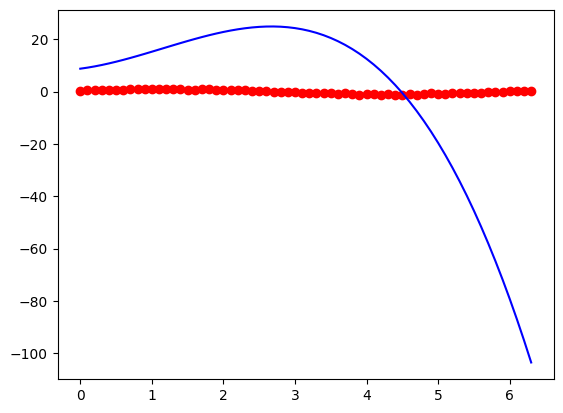



Case:  2 [9.08, -1.38, -8.34, -9.25, 2.01, 0.06]


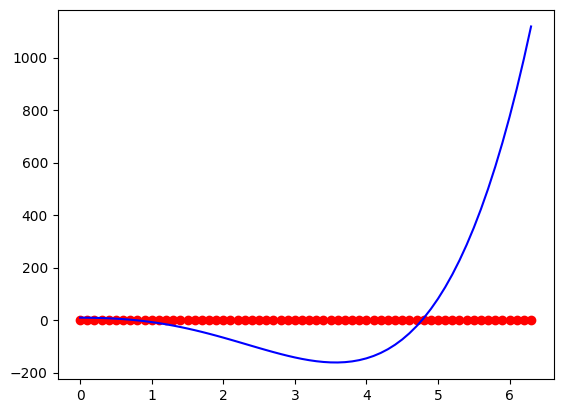



Case:  3 [6.787056426142641, 2.2084280689058233, -4.111319099118931, 3.0979750699265285, -6.589849639093405, 4.169894398174592, -0.42878152697842253]


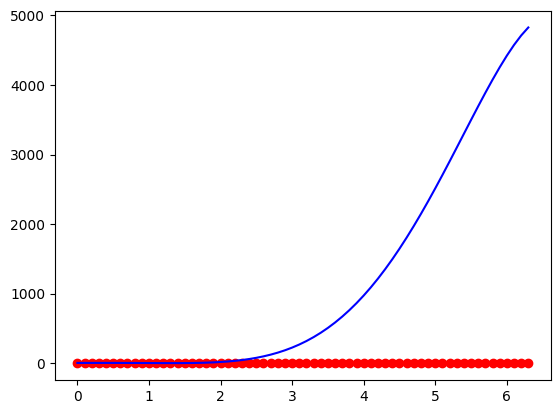



Case:  4 [9.52, -3.32, -1.33, -0.96, 0.34]


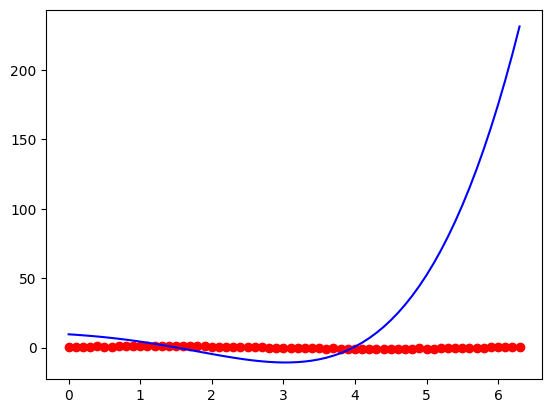



Case:  5 [0.19018617366060647, -3.94323967411696, 1.4298687118474565, 2.3801531498630317, 5.63920304551884, 9.275404973921248, 5.73751871635386, 8.008879204965005, 6.903350024534668, -3.6000098077724814, 0.22255974057076683]


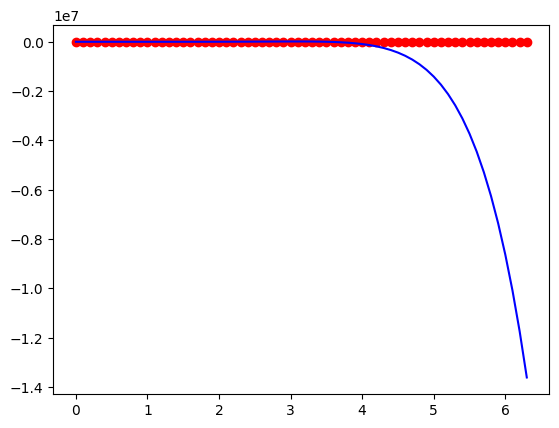

In [160]:
def get_points(n):
    X = []
    Y = []
    X.clear()
    Y.clear()
    for i in range(n):
        X.append(float(all_input_file[i][0]))
        Y.append(float(all_input_file[i][1]))
    return X, Y


def calc_new_y(x, coeff):
    Y = []
    Y.clear()
    for j in range(len(x)):
        Y_calc = 0
        for i in range(1, len(coeff)):
            Y_calc += (coeff[i] * pow(x[j], i))
        Y_calc += coeff[0]
        Y.append(Y_calc)
    return Y


def main():
    global index_of_min

    number_of_data_set = int(all_input_file[0][0])
    all_input_file.remove(all_input_file[0])

    f = open("output.txt", "w")
    X = []
    Y = []
    for case in range(number_of_data_set):
        X.clear()
        Y.clear()
        number_of_point = int(all_input_file[0][0])
        degree = int(all_input_file[0][1])
        all_input_file.remove(all_input_file[0])
        generate_population(degree)

        for index_of_generation in range(number_of_generation):
            parent_1 = selection(degree, number_of_point)
            parent_2 = selection(degree, number_of_point)
            cross_over(parent_1, parent_2, degree)
            mutation(parent_1, degree, index_of_generation, number_of_generation)
            mutation(parent_2, degree, index_of_generation, number_of_generation)
        fill_fitness_array(degree, number_of_point)
        Min = min(fitness_array)
        for i in range(len(fitness_array)):
            if fitness_array[i] == Min:
                index_of_min = i
                break

        X, Y = get_points(number_of_point)
        predicted_Y = calc_new_y(X, population[index_of_min])
        plt.figure()
        plt.scatter(X, Y, color='red')
        print("\n")
        plt.plot(X, predicted_Y, color='blue')
        f.write("\nCase: ")
        f.write(str(case + 1))
        f.write("\n" + str(population[index_of_min]))

        print("Case: ", case + 1, population[index_of_min])
        all_input_file[:number_of_point] = []
        fitness_array.clear()
        plt.show()

main()

<h3>Conclusion</h3>
<p>
The curve fitting genetic algorithm implemented in this program utilizes tournament selection, 2-point crossover, non-uniform mutation, and elitist replacement to find the best coefficients for a polynomial equation that minimizes the distance to given data points. By adjusting the parameters of the genetic algorithm, such as population size and number of iterations, you can explore different trade-offs between exploration and exploitation in the search for the optimal solution. The genetic algorithm provides an effective approach for solving curve fitting problems by iteratively evolving a population of candidate solutions to improve the fitness and convergence towards the optimal solution.

</p>

<h3>Question</h3>
<h4>Q1</h4>
<p>
In a genetic algorithm (GA), the size of the population is a crucial parameter that can significantly impact the algorithm's performance. Both very small and very large populations can cause problems, and their effects depend on the specific problem being solved and the other parameters and operators used in the GA



Very Small Population:

Limited Diversity: A small population size reduces the genetic diversity within the population. This lack of diversity can lead to premature convergence, where the algorithm converges to a suboptimal solution or gets stuck in local optima.
Exploration vs. Exploitation Trade-off: GAs rely on the exploration of the solution space to find better solutions, and a small population may focus too much on exploitation. This can hinder the algorithm's ability to discover novel and better solutions.
Reduced Solution Quality: With a small population, the algorithm may not explore the solution space effectively, resulting in suboptimal solutions.



Very Large Population:

Increased Computational Complexity: Managing a large population requires more computational resources (memory and processing power). This can make the algorithm slower and less efficient.
Diminishing Returns: Increasing the population size beyond a certain point often leads to diminishing returns in terms of improved solution quality. More individuals do not necessarily equate to better results.
Overhead: Managing a large population can introduce overhead in terms of selection, crossover, and mutation operations, which may outweigh the benefits of having more individuals.
Risk of Convergence to Local Optima: Paradoxically, a very large population can also lead to convergence to local optima, as the algorithm might struggle to converge on a specific solution due to the sheer number of individuals.



The optimal population size for a genetic algorithm depends on the nature of the problem, the representation of solutions, and the algorithm's other parameters, such as mutation and crossover rates. It often requires empirical testing and experimentation to find the right balance.
</p>

<h4>Q2</h4>
<p>
Increasing the number of individuals in the population in each generation of a genetic algorithm can have both positive and negative effects on the accuracy and speed of the algorithm, and the impact depends on various factors. Here's how it can affect the performance:


Positive Effects:

Improved Accuracy: A larger population can lead to better accuracy because it provides more opportunities for exploration of the solution space. With a greater number of individuals, the algorithm is more likely to discover high-quality solutions and avoid premature convergence to suboptimal solutions.

Increased Diversity: A larger population usually contains a more diverse set of solutions. This diversity can help the algorithm explore a broader range of potential solutions, which is essential for escaping local optima and finding global optima.

Robustness: A larger population can make the algorithm more robust, as it's less susceptible to the negative effects of noise in the fitness evaluations or variations in the problem landscape. It can better withstand perturbations and provide more reliable results.

Negative Effects:

Slower Convergence: A larger population size can lead to slower convergence because it requires more evaluations of the fitness function, more computation, and more time to reach each generation. The algorithm may take longer to produce results.

Increased Computational Complexity: Managing a larger population demands more memory and processing power. This can strain computational resources and may not be feasible for very large populations.

Diminishing Returns: Beyond a certain point, increasing the population size may not significantly improve accuracy. The improvements may become marginal while the computational cost continues to increase.

</p>

<h3>Q3</h3>
<p>
Crossover and mutation are two fundamental operators in genetic algorithms (GAs), each serving a unique role in the evolutionary process. They have distinct effects, and both are typically used in conjunction, but using only one of them can have limitations.

Crossover:

Effect: Crossover is a process that combines genetic information from two parent individuals to create one or more offspring. It promotes the exchange and recombination of genetic material, which often results in offspring that inherit beneficial characteristics from both parents. It can lead to the exploration of the solution space, creating solutions that are a mix of the parent solutions.

Advantages:

Promotes recombination, which can lead to rapid convergence towards promising solutions.
Helps in preserving building blocks (good subcomponents of solutions) by combining them from parents.
Encourages the sharing of good features among individuals.
Mutation:

Effect: Mutation introduces small, random changes in the genetic material of an individual. It adds diversity to the population by creating novel solutions. Mutation can be thought of as a mechanism to explore the solution space by introducing perturbations to existing solutions.

Advantages:

Helps maintain diversity in the population, preventing premature convergence to suboptimal solutions.
Can introduce entirely new and unexplored solutions.
Serves as a mechanism to escape local optima by introducing randomness.
Comparison:

Crossover is more focused on exploiting the existing information within the population, combining and refining genetic material to converge toward better solutions.

Mutation is primarily focused on exploring the solution space and introducing randomness, maintaining diversity, and preventing the algorithm from getting stuck in local optima.

Using Only One:

While it is possible to use only one of these operators, it is generally not advisable for several reasons:

Limited Exploration: Using only crossover might lead to premature convergence, making it difficult for the algorithm to explore the entire solution space, especially if the initial population is not diverse. Using only mutation might not allow efficient exploitation of the genetic information present in the population.

Slower Convergence: Relying solely on mutation can lead to slower convergence since the introduction of new, high-quality genetic material from crossover is a more efficient way to quickly improve the population's quality.

Loss of Information: Omitting one of these operators might lead to a loss of genetic information that could be crucial for finding optimal or near-optimal solutions.

Balancing Exploration and Exploitation: The combination of crossover and mutation helps balance the exploration of new areas of the solution space (mutation) with the exploitation of known good solutions (crossover).

In practice, a combination of both crossover and mutation is used in genetic algorithms to harness the strengths of both operators. The specific balance between these operators, as well as their application rates, is often subject to experimentation and fine-tuning depending on the problem at hand. This combination is more robust and effective in finding high-quality solutions in a wide range of problems.

</p>

<h3>Q4</h3>
<p>

To obtain answers to a problem faster, especially in the context of optimization or search problems commonly addressed by genetic algorithms, there are several strategies and techniques that can be employed:

Parallelization:
Utilize parallel computing resources or distributed computing frameworks to perform multiple evaluations or simulations concurrently. This can significantly speed up the search process by exploiting available hardware resources.

Optimized Genetic Algorithm Parameters:
Experiment with different parameter settings for your genetic algorithm, such as population size, mutation rate, and crossover methods, to find the most efficient combination for your specific problem

Hybrid Algorithms:
Combine genetic algorithms with other optimization techniques, such as local search algorithms or machine learning models, to improve the efficiency of the search process.

Adaptive Techniques:
Implement adaptive strategies for parameter tuning during the optimization process. Techniques like adaptive mutation rates or population resizing can help the algorithm adapt to the characteristics of the problem and converge faster.

Problem-Specific Representations:
Consider using problem-specific representations and operators tailored to the unique features of your problem. This can often lead to more efficient solutions.

Fitness Function Evaluation Optimization:
Optimize the computation of the fitness function. Use techniques like caching, approximation, or parallel evaluation to reduce the time required for fitness calculations.

Early Stopping Criteria:
Implement early stopping criteria based on certain conditions, such as reaching a known lower bound or observing a lack of progress, to save computational resources when it's clear that further iterations are unlikely to yield significantly better results.

Population Initialization:
Carefully design the initial population to have a good balance of exploration and exploitation. A well-chosen initial population can reduce the number of generations needed for convergence.

Problem Decomposition:
If your problem can be decomposed into smaller subproblems, consider solving these subproblems independently before combining their solutions. This can reduce the overall search space and speed up the optimization process.

Niching Techniques:
Implement niching techniques to maintain diversity in the population and prevent premature convergence to local optima. These techniques can help explore multiple areas of the solution space simultaneously.

Surrogate Models:
Use surrogate models, such as regression models or neural networks, to approximate the fitness landscape and guide the search. Surrogate models can help reduce the number of expensive fitness evaluations.

Problem Preprocessing:
Preprocess the problem or data to reduce its complexity or remove irrelevant variables. Simplifying the problem can make the search process more efficient.
Leverage Problem-Specific Heuristics:

</p>
<h3>Q5<h3>
<p>
When chromosomes in a genetic algorithm (GA) remain unchanged for several generations, it is an indication of a lack of genetic diversity and is often referred to as "stagnation" or "convergence to a local optima." This situation can occur due to several reasons and can lead to various problems, such as premature convergence and a failure to explore the solution space effectively. Here's an explanation of the reasons and potential solutions:

Reasons for Stagnation:

Loss of Diversity: Over several generations, if the population converges to similar or identical solutions, genetic diversity is lost. This can happen due to selection pressure favoring a subset of the population, which may occur when highly fit individuals dominate.

Inadequate Mutation Rate: If the mutation rate is too low, the genetic algorithm may not introduce enough random perturbations into the population to escape local optima or explore new regions of the solution space.

Insufficient Exploration: If the initial population or genetic operators do not encourage exploration, the algorithm may quickly focus on exploiting a limited area of the solution space, ignoring other potentially better solutions.

Problems Caused by Stagnation:

Suboptimal Solutions: Stagnation often leads to the convergence on suboptimal solutions, preventing the algorithm from finding better solutions that may exist in the solution space.

Inefficient Use of Resources: It results in inefficient use of computational resources, as the algorithm continues to evaluate and evolve a population that is not improving.

Solutions to Address Stagnation:

Increase Mutation Rate: Gradually increase the mutation rate during the optimization process. Higher mutation rates can introduce more randomness and exploration into the population, potentially helping the algorithm escape stagnation.

Niching and Diversity Maintenance: Implement niching techniques to maintain diversity in the population. Techniques like crowding or sharing functions can penalize individuals that are too similar, encouraging a more diverse population.

Dynamic Parameters: Implement dynamic parameter adaptation, where algorithm parameters (e.g., mutation rate, crossover rate) are adjusted during the optimization based on the algorithm's performance. This helps strike a balance between exploration and exploitation.

Crossover Variation: Experiment with different crossover methods and operator variations. Some crossover methods may be better suited for preserving diversity.

Restart or Reset: In some cases, it might be beneficial to restart the algorithm from scratch with a new initial population if stagnation persists.

Multi-objective Optimization: If the problem involves multiple objectives, consider using multi-objective GAs. These algorithms aim to find a trade-off between multiple objectives and can help maintain diversity in the population.

Hybrid Techniques: Combine the genetic algorithm with other optimization techniques, like local search or simulated annealing, to help explore the solution space more effectively.

Problem-Specific Strategies: Depending on the problem, you may need to employ domain-specific knowledge or heuristics to guide the search and avoid stagnation.

Addressing stagnation is essential to ensure that the genetic algorithm converges to high-quality solutions. However, it may require experimentation and fine-tuning to determine the most effective combination of strategies for a particular problem.
</p>
<h3>Q6</h3>
<p>

If your genetic algorithm does not seem to be converging or finding a satisfactory solution even after extensive execution, there are several potential actions you can take to finish the program or gracefully terminate it. The specific approach you choose depends on your objectives, the computational resources available, and the nature of the problem. Here are some suggestions:

Set a Maximum Execution Time:
Define a maximum allowed execution time for your program. If the algorithm has not found a satisfactory solution within that time frame, terminate it. This prevents the program from running indefinitely and consuming excessive computational resources.

Implement a Convergence Check:
Monitor the progress of your genetic algorithm by tracking performance metrics (e.g., best fitness, diversity in the population). If these metrics show no improvement over a specified number of generations, you can choose to terminate the algorithm.

Use a Convergence Threshold:
Set a convergence threshold for the fitness value. If the best fitness does not improve or remains above a certain threshold for an extended period, it can be an indicator that further progress is unlikely. You can then stop the algorithm.

User Intervention:
Allow for manual intervention. If the algorithm is not converging, provide an option for the user to manually halt the optimization process and inspect the current best solution or explore other approaches.

Restart or Rerun the Program:
If your program is not finding satisfactory solutions and you have the computational resources, consider restarting the program with different initial conditions, parameter settings, or optimization techniques. It's possible that the initial setup or configuration was not conducive to finding good solutions.

Collect and Analyze Data:
Even if the algorithm does not converge to a satisfactory solution, it may provide valuable data on the behavior of the optimization process. Analyze the data to gain insights into why the algorithm is not working as expected, which can inform future improvements.

Alternative Optimization Techniques:
If the genetic algorithm is consistently unsuccessful, consider trying alternative optimization techniques or algorithms that might be better suited to your problem.

Modify the Problem or Model:
If possible, revisit the problem formulation or model. There may be aspects of the problem definition that make it exceptionally challenging for GAs. Modifying the problem or its representation may make it more amenable to optimization.

Consult with Experts:
Seek advice from experts in the field relevant to your problem. They may be able to provide insights, alternative approaches, or domain-specific knowledge that can help you find a solution.



Remember that the decision to terminate the program should be based on a balance between computational resources, time constraints, and the importance of obtaining a solution. It's also a good practice to log the details of the algorithm's execution and any termination criteria used so that you can analyze the results and improve your optimization process in the future.
</p>
<h3>Q7</h3>
<p>

The time to find the coefficients of a polynomial using a genetic algorithm (GA) can change as the degree of the polynomial increases. The relationship between the polynomial degree and the time required when using a GA is influenced by several factors:

Search Space Size: With a higher degree polynomial, the search space of potential solutions expands. In the context of GAs, this means that there are more potential combinations of coefficients to explore. As the search space grows, it generally takes longer to find optimal solutions.

Population Size: The size of the population in the genetic algorithm can impact the search process. For higher-degree polynomials, it may be necessary to use a larger population to effectively explore the larger search space. A larger population can lead to longer computation times.

Generation Count: Finding optimal coefficients in a GA involves evolving a population of candidate solutions over a series of generations. Higher-degree polynomials may require more generations to converge to good solutions, further extending the time required.

Mutation and Crossover Rates: The choice of mutation and crossover rates can significantly affect the convergence speed of the GA. For high-degree polynomials, the rates may need to be carefully adjusted to balance exploration and exploitation. Determining the optimal rates may require additional time-consuming experimentation.

Computational Resources: The speed of the genetic algorithm's execution can be influenced by the computational resources available. More powerful hardware, such as faster processors and more memory, can speed up the GA's execution for high-degree polynomials.

Stagnation and Convergence: For high-degree polynomials, there's an increased risk of stagnation (lack of progress) or convergence to local optima. Strategies to prevent stagnation or facilitate exploration, such as adaptive parameters or diversity maintenance, may be needed, which can add complexity and time to the optimization process.

Parallelization: Parallelization of the GA can be used to speed up the search process. Distributing the computation across multiple processing units can help explore the search space more efficiently and reduce the time required.

Termination Criteria: Deciding when to stop the GA can be challenging for high-degree polynomials. Setting appropriate termination criteria based on factors like the number of generations, convergence behavior, or computational budget is crucial.

 As the degree of the polynomial increases, the time to find the coefficients using a genetic algorithm generally increases due to the larger search space and the need for more extensive search. Careful parameter tuning and consideration of computational resources are important to strike a balance between accuracy and time efficiency when working with high-degree polynomials in GAs. Additionally, the use of problem-specific heuristics or surrogate models can help speed up the optimization process for complex polynomial fitting tasks.

</p>

<h3>Q8</h3>
<p>
The number of data points in a dataset can have a significant impact on the implementation and performance of a genetic algorithm (GA), particularly when using GAs for optimization, parameter estimation, or function approximation tasks. Here's how increasing or decreasing the number of data points can affect the implementation of a genetic algorithm:

Increasing the Number of Data Points:

Improved Estimation: With more data points, the GA has access to a larger and more representative sample of the problem space. This often leads to more accurate estimation of the model parameters or objective function.

Convergence: GAs tend to converge more efficiently with a larger number of data points. The increased information helps guide the search process towards better solutions more quickly.

Reduced Overfitting: A larger dataset can reduce the risk of overfitting, as the model is less likely to fit random noise in the data. This can lead to more robust and generalizable solutions.

Population Size: To effectively explore a larger dataset, it might be necessary to use a larger population size in the GA to maintain diversity and coverage. This can increase computational requirements.

Computation Time: Handling a larger dataset requires more computation time for fitness evaluations and can extend the overall runtime of the GA.

Memory Requirements: Larger datasets may necessitate more memory for storing and processing the data. Be mindful of memory constraints when working with extensive datasets.

Parameter Tuning: The GA's parameters, such as mutation rate and crossover rate, may need to be adjusted to account for the increased data size. Fine-tuning these parameters can be time-consuming.

Decreasing the Number of Data Points:

Reduced Complexity: Smaller datasets are computationally less demanding to work with, as there are fewer data points to process. This can lead to faster execution.

Potential Overfitting: Smaller datasets increase the risk of overfitting, as the model may try to fit noise or spurious patterns. Regularization techniques may be needed to mitigate this risk.

Easier Population Management: A smaller dataset may require a smaller population size, which can simplify the GA implementation and reduce memory and computational requirements.

Faster Convergence: GAs may converge more quickly on smaller datasets. This can be advantageous when rapid exploration of the search space is not as crucial.

Data Quality: Smaller datasets may be more susceptible to noise, outliers, or missing values. Preprocessing and data quality assessment become even more critical in such cases.

In conclusion, the number of data points in a dataset can significantly influence the behavior and performance of a genetic algorithm. Balancing the trade-offs between data size, computational resources, and the accuracy of the optimization is a crucial consideration when implementing GAs. Proper preprocessing, regularization, and parameter tuning are essential for effectively using GAs with datasets of varying sizes.

</p>